In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: zhenweipan
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey


100%|██████████| 48.8k/48.8k [00:00<00:00, 105MB/s]

In [ ]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

# 'Pandas' is used for data manipulation and analysis
import pandas as pd

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

import plotly.express as px

# import 'is_string_dtype' to check if the type of input is string
from pandas.api.types import is_string_dtype

# import various functions to perform classification
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# display all columns of the dataframe
pd.options.display.max_columns = None

In [ ]:
data_set = pd.read_csv('/content/mental-health-in-tech-survey/survey.csv')
data_set.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


<Figure size 1000x800 with 0 Axes>

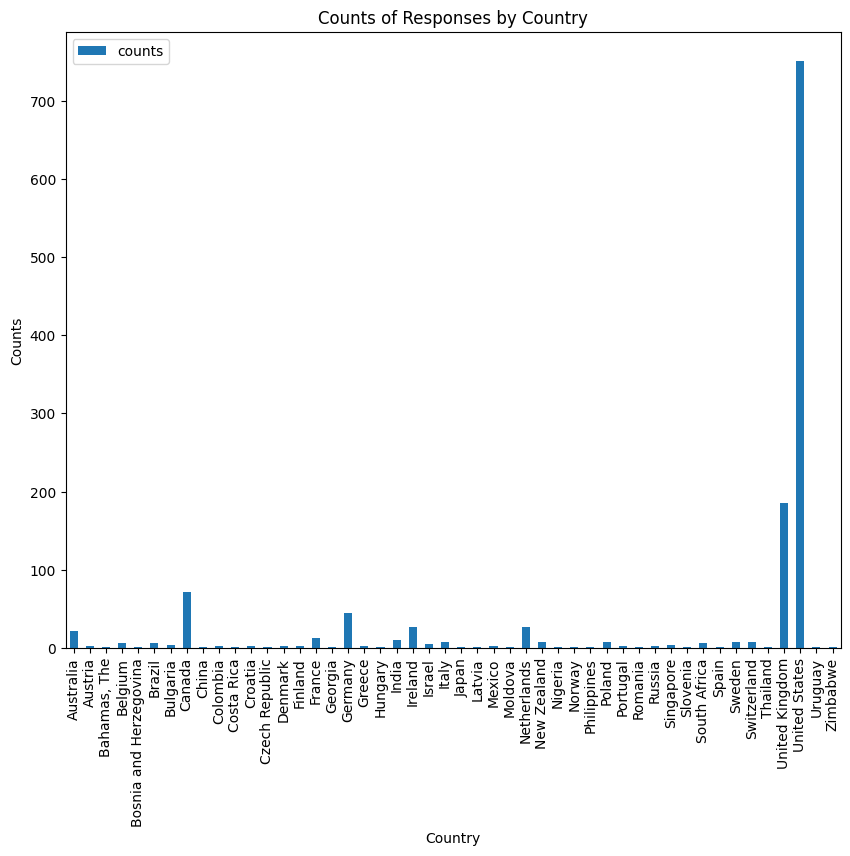

In [ ]:
# Grouping by country and counting
country_counts = data_set.groupby('Country').size().reset_index(name='counts')

# Visualizing the count data
plt.figure(figsize=(10, 8))
country_counts.plot(kind='bar', x='Country', y='counts', figsize=(10, 8))
plt.title('Counts of Responses by Country')
plt.xlabel('Country')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Data Cleaning

In [ ]:
# Clean the data
# Get rid of the variables "Timestamp", "comments", "state" just to make our lives easier.
data_set = data_set.drop(['comments'], axis=1)

data_set = data_set.drop(['Timestamp'], axis=1)

# For rows with NaN values in the 'state' column, fill them with the country names from the 'Country' column
data_set.loc[data_set['state'].isna(), 'state'] = data_set['Country']

# Fill missing values in 'work_interfere' with a placeholder (e.g., 'Unknown')
data_set['work_interfere'].fillna('Unknown', inplace=True)

# Remove rows with missing values in the 'self_employed' column
data_set = data_set.dropna(subset=['self_employed'])

data_set.isnull().sum().max() # Just checking that there's no missing data left...

data_set.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,46,male,United States,MD,Yes,Yes,No,Sometimes,1-5,Yes,Yes,Yes,Not sure,Yes,Don't know,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
19,36,Male,France,France,Yes,Yes,No,Unknown,6-25,Yes,Yes,No,No,Yes,No,Yes,Somewhat easy,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No
20,29,Male,United States,NY,No,Yes,Yes,Sometimes,100-500,No,Yes,Yes,Yes,No,No,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
21,31,male,United States,NC,Yes,No,No,Never,1-5,Yes,Yes,No,No,No,No,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
22,46,Male,United States,MA,No,No,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No


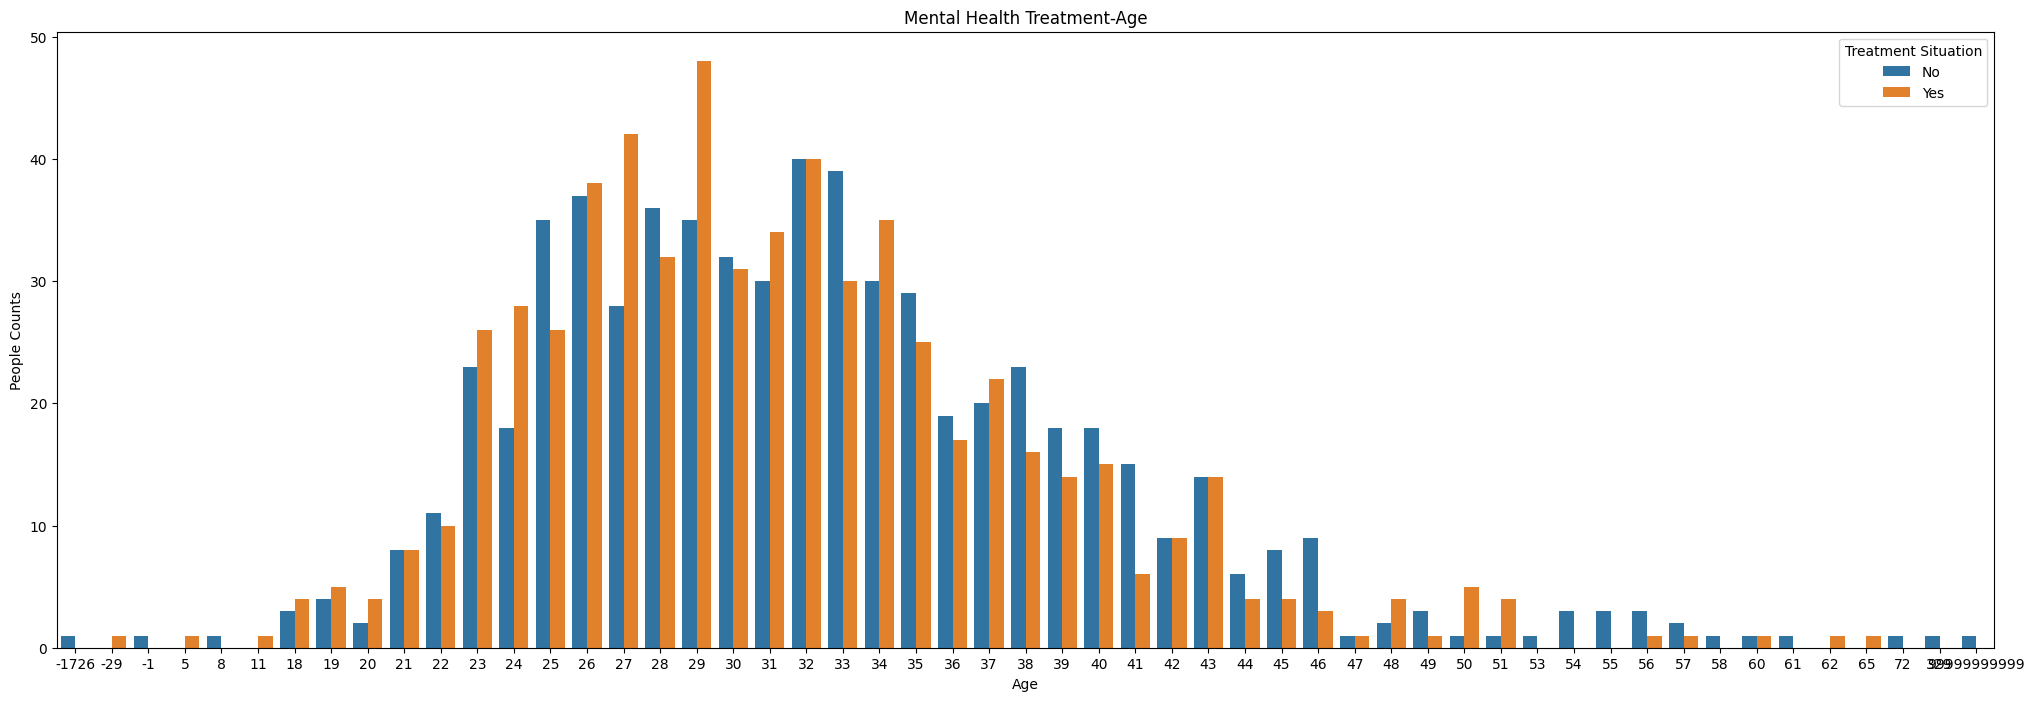

In [ ]:
# Treatment Status by Age Chart
plt.figure(figsize=(25, 8))
sns.countplot(x='Age', hue='treatment', data=data_set)
plt.title('Mental Health Treatment-Age')
plt.xlabel('Age')
plt.ylabel('People Counts')
plt.legend(title='Treatment Situation', labels=['No', 'Yes'])
plt.show()

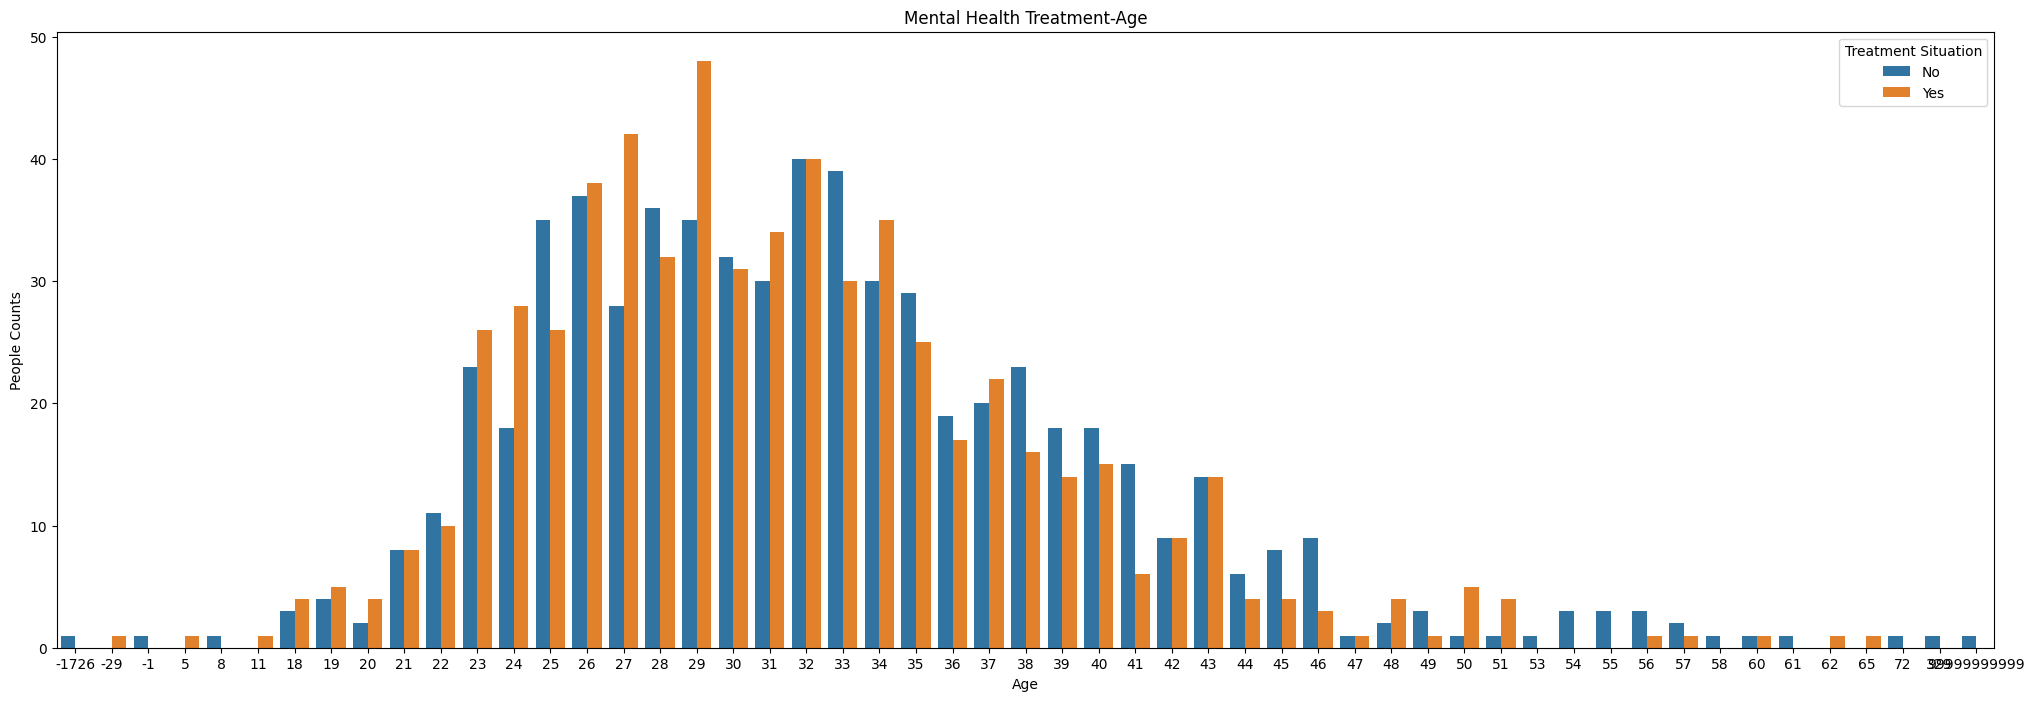

In [ ]:
df = data_set[(data_set['Age'] > 17) & (data_set['Age'] <= 100)]

# Plot the filtered data
plt.figure(figsize=(25, 8))
sns.countplot(x='Age', hue='treatment', data=data_set)
plt.title('Mental Health Treatment-Age')
plt.xlabel('Age')
plt.ylabel('People Counts')
plt.legend(title='Treatment Situation', labels=['No', 'Yes'])
plt.show()

In [ ]:
# Gender

In [ ]:
df['Gender'].unique()

array(['male', 'Male', 'Female', 'female', 'M', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'Malr', 'femail',
       'Cis Man', 'ostensibly male, unsure what that really means'],
      dtype=object)

In [ ]:
# Unique values in the Gender column
distinct_genders = df['Gender'].unique()

# Create a mapping table
gender_mapping = {
    'Male': ['Male', 'male', 'M', 'm', 'Cis Male', 'cis male', 'Male (CIS)', 'cis-male/femme', 'Mail', 'Mailr', 'Malr', 'msle', 'guy (-ish) ^_^'],
    'Female': ['Female', 'female', 'F', 'f', 'Cis Female', 'cis-female/femme', 'Cis Woman', 'Female (cis)', 'Trans Female', 'Trans woman', 'Trans-female'],
    'Non-binary': ['Non-binary', 'non-binary', 'Genderqueer', 'genderqueer', 'Androgyne', 'Agender', 'fluid', 'Neuter', 'androgyne'],
    'Other': ['Other', 'Nah', 'All', 'Enby', 'something kinda male?', 'male leaning androgynous', 'queer', 'queer/she/they', 'queer/she/they', 'ostensibly male, unsure what that really means', 'Guy (-ish) ^_^', 'A little about you']
}

# Reverse the mapping table
reverse_mapping = {value: key for key, values in gender_mapping.items() for value in values}

# Re-categorize the Gender column
df['Gender'] = df['Gender'].apply(lambda x: reverse_mapping.get(x, 'Other'))

df['Gender'].unique()

array(['Male', 'Female', 'Other', 'Non-binary'], dtype=object)

In [ ]:
# Exploratory Data Analysis

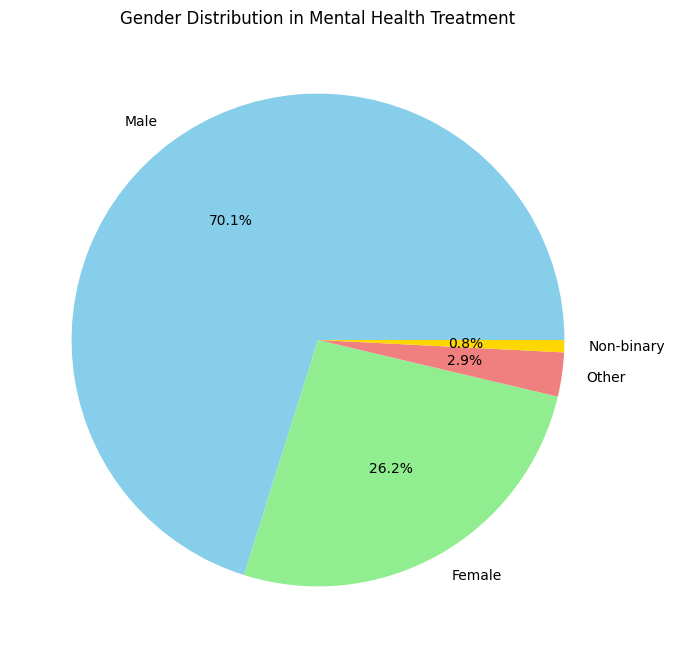

In [ ]:
# Gender distribution in mental health treatment
treatment_counts = df[df['treatment'] == 'Yes']['Gender'].value_counts()

plt.figure(figsize=(8, 8))
treatment_counts.plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
plt.title('Gender Distribution in Mental Health Treatment')
plt.ylabel('')
plt.show()

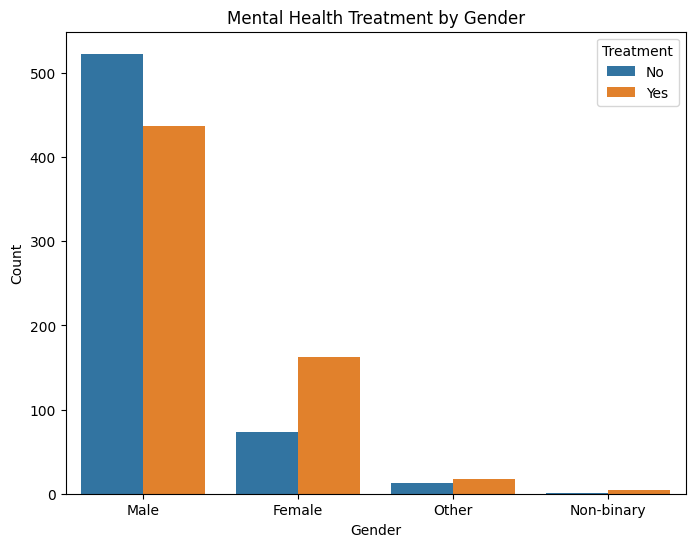

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='treatment', data=df)
plt.title('Mental Health Treatment by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Treatment')
plt.show()

In [ ]:
# Relationship between Company Benefits and Mental Health Treatment

In [ ]:
fig = px.histogram(
    df,
    x='treatment',
    color='treatment',
    facet_col='benefits',
    category_orders={'Benefits': df['benefits'].unique()},
    title='Facet Grid Plot of Company Benefits and Mental Health Treatment',
    labels={'treatment': 'Sought Treatment', 'count': 'Number of Respondents'},
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Update the layout to show hover information
fig.update_traces(hovertemplate='%{y}')

# Update the layout for better visualization
fig.update_layout(
    height=600,
    width=1000,
    bargap=0.2,
    hovermode='x unified'
)

fig.show()

In [ ]:
# Memtal Health Treatment by State & Country

In [ ]:
# Data for states in the United States
us_data = df[df['Country'] == 'United States']
us_treatment_counts = us_data.groupby(['state', 'treatment']).size().reset_index(name='count')
us_total_counts = us_data.groupby('state').size().reset_index(name='total_count')
us_treatment_counts = pd.merge(us_treatment_counts, us_total_counts, on='state')

# Data for the world map
world_data = df[df['Country'] != 'United States']
world_treatment_counts = world_data.groupby(['Country', 'treatment']).size().reset_index(name='count')
world_total_counts = world_data.groupby('Country').size().reset_index(name='total_count')
world_treatment_counts = pd.merge(world_treatment_counts, world_total_counts, on='Country')

# Plotly map: States in the USA
fig_us = px.choropleth(us_treatment_counts,
                       locations='state',
                       locationmode='USA-states',
                       color='count',
                       hover_name='state',
                       hover_data=['count', 'total_count', 'treatment'],
                       color_continuous_scale='Oranges',  # Set the color scale
                       scope='usa',
                       title='Mental Health Treatment by State in the USA')

fig_us.update_layout(geo=dict(showframe=False,
                      showcoastlines=False),
                     width=1000, height=600)  # Adjust the size of the map

# Plotly map: World
fig_world = px.choropleth(world_treatment_counts,
                          locations='Country',
                          locationmode='country names',
                          color='count',
                          hover_name='Country',
                          hover_data=['count', 'total_count', 'treatment'],
                          color_continuous_scale='Oranges',  # Set the color scale
                          title='Mental Health Treatment by Country')

fig_world.update_layout(geo=dict(showframe=False, showcoastlines=False),
                        width=1000, height=600)  # Adjust the size of the map

# Display the maps
fig_us.show()
fig_world.show()

In [ ]:
# Logistic Regression

In [ ]:
# Create a list of significant features
significant_features = [
    'Gender', 'self_employed', 'family_history', 'mental_health_consequence', 'work_interfere',
    'tech_company', 'benefits', 'wellness_program', 'seek_help', 'anonymity',
    'leave', 'phys_health_consequence', 'coworkers', 'supervisor',
    'mental_health_interview', 'phys_health_interview', 'mental_vs_physical',
    'obs_consequence', 'no_employees'
]

# Define the dependent and independent variables
X = df[significant_features]
y = df['treatment']

# Encode categorical variables using One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Calculate Odds Ratios
odds_ratios = np.exp(model.coef_[0])
or_df = pd.DataFrame(odds_ratios, index=X.columns, columns=['Odds Ratio'])

# Ensure all columns are displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print('\nOdds Ratios:')
print(or_df)

Accuracy: 0.8243243243243243
Classification Report:
              precision    recall  f1-score   support

          No       0.85      0.76      0.80       175
         Yes       0.80      0.88      0.84       195

    accuracy                           0.82       370
   macro avg       0.83      0.82      0.82       370
weighted avg       0.83      0.82      0.82       370

Confusion Matrix:
[[133  42]
 [ 23 172]]

Odds Ratios:
                               Odds Ratio
Gender_Male                      0.500010
Gender_Non-binary                1.539541
Gender_Other                     0.673378
self_employed_Yes                0.955438
family_history_Yes               2.476762
mental_health_consequence_No     0.658878
mental_health_consequence_Yes    1.087016
work_interfere_Often            18.045524
work_interfere_Rarely            6.937177
work_interfere_Sometimes        10.773329
work_interfere_Unknown           0.088463
tech_company_Yes                 0.874518
benefits_No         